✅ Saved: plots/LGBM_Accuracy_Comparison.png
✅ Saved: plots/LGBM_F1_Comparison.png
✅ Saved: plots/LGBM_Loss_Comparison.png


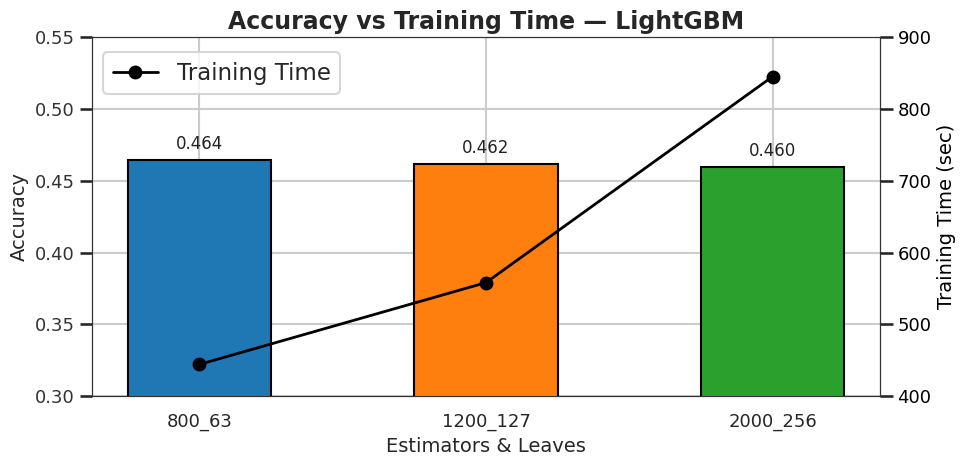

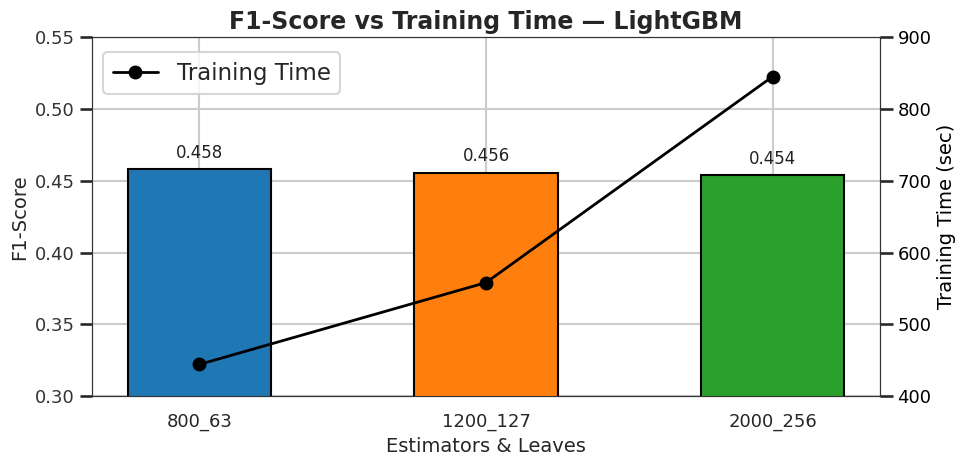

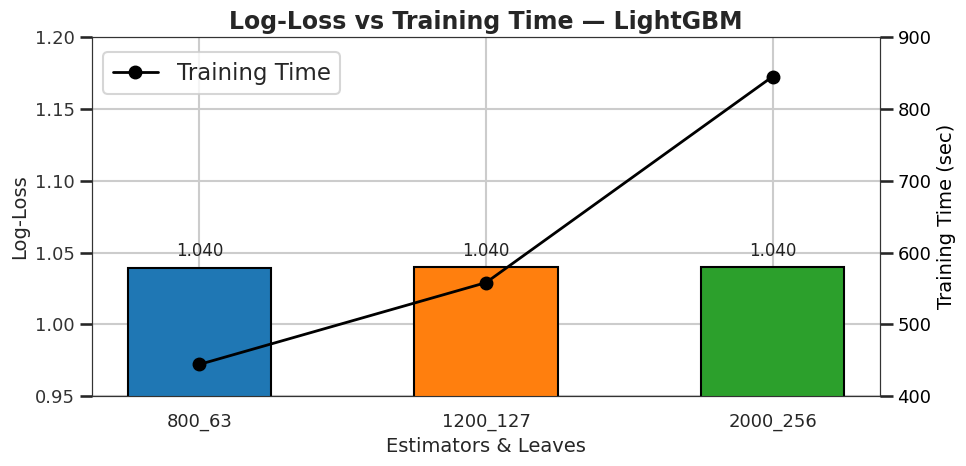

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load CSV ===
df = pd.read_csv("metrics_lgbm.csv")

# # === 1.1 Convert Time (seconds → minutes) ===
# df["Time"] = df["Time"] / 60.0  # convert to minutes

# === 2. Output folder ===
os.makedirs("plots", exist_ok=True)

# === 3. Global style ===
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.edgecolor": "#333333",
    "axes.linewidth": 0.8,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13
})

# === 4. Colors ===
base_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # one per hidden layer structure

# === 5. Plot helper ===
def plot_metric(metric_name, ylabel, save_name):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    x = range(len(df))
    colors = base_palette[:len(df)]
    
    # === Bar plot for the metric ===
    bars = ax1.bar(x, df[metric_name], color=colors, edgecolor="black", width=0.5, label=metric_name)

    ax1.set_axisbelow(True)
    for bar in bars:
        bar.set_zorder(3)
        h = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, h + 0.005, f"{h:.3f}",
                 ha="center", va="bottom", fontsize=12, color="#222222")

    ax1.set_ylabel(ylabel, fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(df["Est&Lea"])
    ax1.set_xlabel("Estimators & Leaves", fontsize=14)
    ax1.tick_params(axis='y', labelcolor="#333333")

    # === Set y-axis range for metric (optional) ===
    if metric_name in ["Accuracy", "F1-Score"]:
        ax1.set_ylim(0.30, 0.55)
    elif metric_name == "Log-Loss":
        ax1.set_ylim(0.95, 1.20)

    # === Secondary axis for time (in minutes) ===
    ax2 = ax1.twinx()
    ax2.grid(False)
    ax2.plot(x, df["Time"], color="black", marker="o", linewidth=2, label="Training Time")
    ax2.set_ylabel("Training Time (sec)", fontsize=14, color="black")
    ax2.tick_params(axis='y', labelcolor="black")

    # === Set y-axis range for time ===
    ax2.set_yticks(range(400, 1000, 100))

    # === Title and layout ===
    plt.title(f"{metric_name} vs Training Time — LightGBM", weight="bold", fontsize=17)
    fig.tight_layout()

    ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.99))
    # ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.88))

    save_path = f"plots/{save_name}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {save_path}")

# === 6. Generate plots ===
plot_metric("Accuracy", "Accuracy", "LGBM_Accuracy_Comparison")
plot_metric("F1-Score", "F1-Score", "LGBM_F1_Comparison")
plot_metric("Log-Loss", "Log-Loss", "LGBM_Loss_Comparison")